# Improving Computer Vision Accuracy using Convolutions

In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

## function to plot history

In [2]:
def plot_history(history):

  # summarize history for loss
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train'], loc='upper left')
  plt.show()


  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train'], loc='upper left')
  plt.show()

## scaling

In [3]:
# Reload the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

## using Standard Scaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = standard_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step


## create model

In [8]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
tf.random.set_seed(10)


# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  # generate 32 filters, 3 by 3 
  # 32 filters meaning there would be 32 new images convoluted
  # input_shape=(28, 28, 1) means the dimension of image is 28 by 28 and only 1 channel (grayscale 0-255)
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [9]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(x_train, y_train, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4324 - accuracy: 0.8447
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2982 - accuracy: 0.8905
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2552 - accuracy: 0.9057
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2230 - accuracy: 0.9171
Epoch 5/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1979 - accuracy: 0.9263


In [11]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)


MODEL EVALUATION:
313/313 [==============================] - 6s 15ms/step - loss: 0.2604 - accuracy: 0.9046


In [12]:
test_loss

[0.260435551404953, 0.9046000242233276]

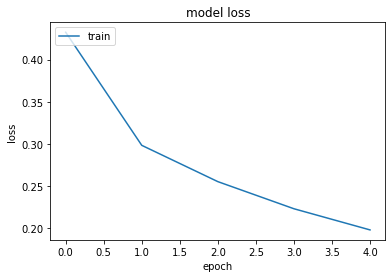

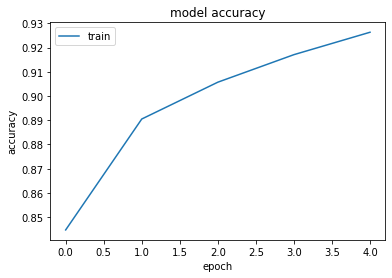

In [13]:
plot_history(history)

## Visualizing the Convolutions and Pooling

In [16]:
model.layers

In [19]:
print(x_test[0].shape)
print(x_test[0].reshape(1, 28, 28, 1).shape)
print(x_test.shape)

(28, 28)
(1, 28, 28, 1)
(10000, 28, 28)


1/1 [==============================] - 0s 22ms/step


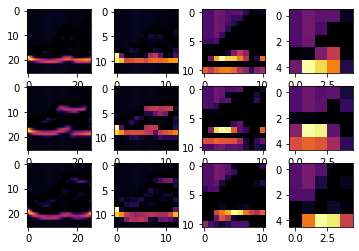

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## change to 64 channels/convolutions